In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad

Matplotlib is building the font cache; this may take a moment.


# Gene-base (nascent)

In [115]:
adata_total = ad.read_h5ad("results/gene_based.h5ad")
cells = set(adata_total.obs.index)
mtx = pd.read_csv("results/blastocyst_counts.genes.gene_name.nascent.tsv", sep="\t", index_col=0, header=0).T
meta = pd.read_csv("results/blastocyst_counts.genes.gene_name.meta.tsv", sep="\t", index_col=1, header=0)
print("Total cells:", len(meta))

Total cells: 2661


In [125]:
adata = ad.AnnData(mtx.copy())
adata.obs = meta.copy()
adata = adata[adata.obs.index.isin(cells)]
adata = adata[(adata.obs["s4U"] == 400) & (adata.obs["Time"] == 3) & (adata.obs["ActD"].isna()) & (adata.obs["TC.Ratio"] >= 0.005)]
sc.pp.calculate_qc_metrics(adata, inplace=True, log1p=True)
# sc.pl.scatter(adata, "total_counts", "n_genes_by_counts")
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_cells(adata, min_counts=1000)
sc.pp.filter_genes(adata, min_cells=3)
adata.obs["CellType"] = adata_total.obs.loc[adata.obs.index]["CellType"]
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
print("Filtered cells:", len(adata))

/lustre/grp/tfclab/chenzg/miniconda3/envs/py3/lib/python3.10/site-packages/scanpy/preprocessing/_qc.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


Filtered cells: 1520


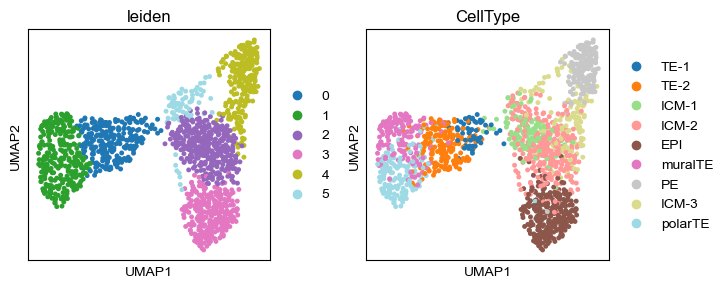

In [127]:
sc.pp.highly_variable_genes(adata, n_top_genes=500)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)
with rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(adata, color=["leiden", "CellType"], palette="tab20", size=50)